In [2]:
#Using ARIMA to forecast future COVIDS deaths

import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


covid_data = pd.read_csv("United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv", 
                         index_col="submission_date", parse_dates=True)


In [3]:
covid_clean_data1 = covid_data[["tot_death"]]
covid_really_clean1 = covid_clean_data1.groupby(covid_clean_data1.index).sum()
covid_really_clean1.reset_index(inplace = True)
covid_really_clean1.columns = ['Date','tot_death']
covid_really_clean1.set_index('Date', inplace=True)
df2 = covid_really_clean1

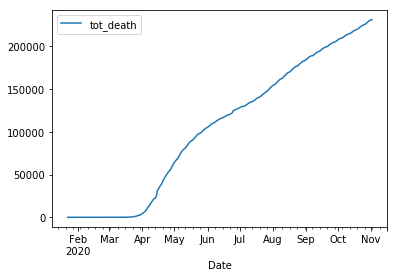

In [5]:
df2.plot()

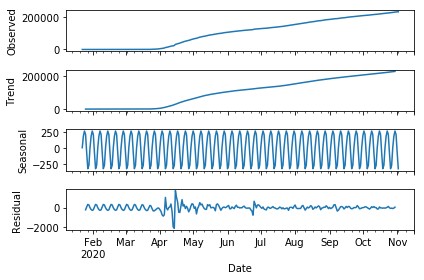

In [6]:
# Run an ETS Decomposition plot

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2['tot_death'], model='additive')  # model='add' also works
result.plot();

In [7]:
# Set about 6 months for testing
train = df2.iloc[:200]
test = df2.iloc[200:]

In [8]:
# Fit an ARIMA (!,1,1) model

model = ARIMA(train['tot_death'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.tot_death   No. Observations:                  199
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1527.886
Method:                       css-mle   S.D. of innovations            520.698
Date:                Thu, 12 Nov 2020   AIC                           3063.773
Time:                        21:24:07   BIC                           3076.946
Sample:                    01-23-2020   HQIC                          3069.104
                         - 08-08-2020                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               730.8279    413.000      1.770      0.078     -78.636    1540.292
ar.L1.D.tot_death     0.9811      0.014     72.487      0.000       0.955       1.008
ma.L1.D.tot_death    -0.7433      0.045    -16.353      0.000      -0.832      -0.654
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0192           +0.0000j            1.0192            0.0000
MA.1            1.3454           +0.0000j            1.3454            0.0000
-----------------------------------------------------------------------------
"""

In [9]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,1) Predictions')

In [10]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['tot_death'][i]}")

predicted=162396.4287, expected=161842
predicted=163501.6556, expected=162407
predicted=164599.8166, expected=163651
predicted=165691.0451, expected=165148
predicted=166775.4718, expected=166317
predicted=167853.2253, expected=167546
predicted=168924.4313, expected=168696
predicted=169989.2135, expected=169350
predicted=171047.6931, expected=169840
predicted=172099.9891, expected=171012
predicted=173146.2181, expected=172416
predicted=174186.4947, expected=173490
predicted=175220.9312, expected=174645
predicted=176249.6378, expected=175651
predicted=177272.7226, expected=176223
predicted=178290.2918, expected=176617
predicted=179302.4494, expected=177759
predicted=180309.2976, expected=178998
predicted=181310.9366, expected=180165
predicted=182307.4646, expected=181143
predicted=183298.9782, expected=182149
predicted=184285.572 , expected=182622
predicted=185267.3388, expected=183050
predicted=186244.3697, expected=184083
predicted=187216.7542, expected=185092
predicted=188184.5798, ex

[Text(0, 0.5, ''), Text(0.5, 0, '')]

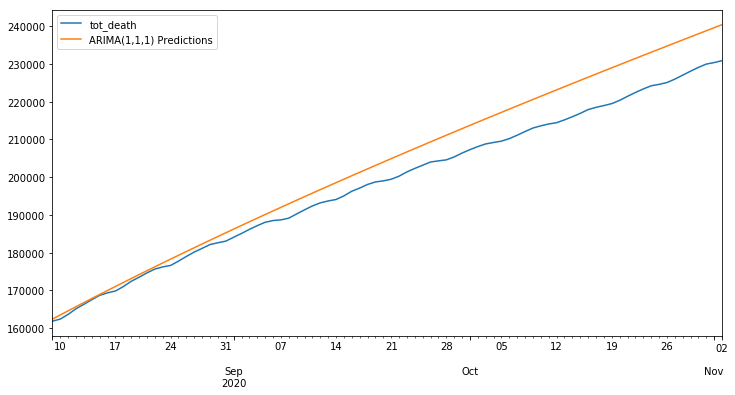

In [13]:
# Plot predictions against known values
ax = test['tot_death'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [14]:
#Use the model with full data and "predict" next 60 days
model = ARIMA(df2['tot_death'],order=(1,1,1))
results = model.fit()
fcast = results.predict(len(df2),len(df2)+60,typ='levels').rename('ARIMA(1,1,1) Forecast')

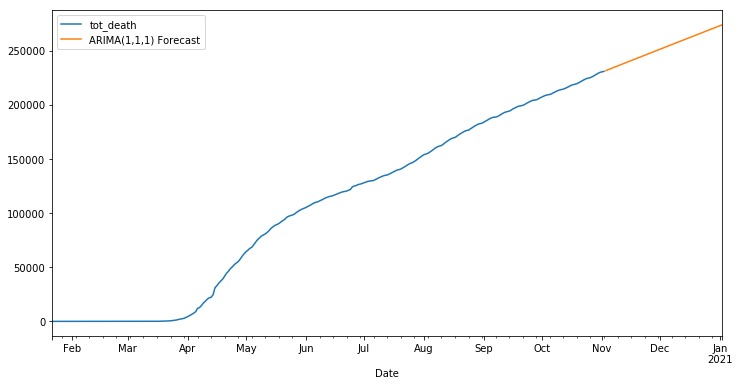

In [16]:
# Plot predictions against known values
title = ''
ylabel=''
xlabel='' # we don't really need a label here

ax = df2['tot_death'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)


In [17]:
# Print the forecasted data
fcast

2020-11-03    231602.251345
2020-11-04    232311.228803
2020-11-05    233019.937609
2020-11-06    233728.382898
2020-11-07    234436.569708
2020-11-08    235144.502979
2020-11-09    235852.187556
2020-11-10    236559.628195
2020-11-11    237266.829556
2020-11-12    237973.796215
2020-11-13    238680.532657
2020-11-14    239387.043283
2020-11-15    240093.332408
2020-11-16    240799.404268
2020-11-17    241505.263014
2020-11-18    242210.912720
2020-11-19    242916.357382
2020-11-20    243621.600919
2020-11-21    244326.647176
2020-11-22    245031.499923
2020-11-23    245736.162859
2020-11-24    246440.639612
2020-11-25    247144.933741
2020-11-26    247849.048737
2020-11-27    248552.988024
2020-11-28    249256.754960
2020-11-29    249960.352840
2020-11-30    250663.784895
2020-12-01    251367.054294
2020-12-02    252070.164147
                  ...      
2020-12-04    253475.917355
2020-12-05    254178.566635
2020-12-06    254881.068222
2020-12-07    255583.424939
2020-12-08    256285